<a href="https://colab.research.google.com/github/alyagabsi/PGGAN-Abstract-Art/blob/main/Model%20Training/PGGAN_%26_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dependencies**

In [ ]:
# importing libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
from PIL import Image
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from google.colab import files
from math import sqrt
from numpy import zeros
from numpy import ones
from skimage.transform import resize


Importing Dataset

In [ ]:
# unzipping file 

# mouting file 
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/PGGAN/
!mkdir dataset

/content/gdrive/MyDrive/Colab Notebooks/PGGAN
mkdir: cannot create directory ‘dataset’: File exists


In [ ]:
!unzip archive\ \(6\).zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/cats/cats/5499.jpg  
  inflating: dataset/cats/cats/55.jpg  
  inflating: dataset/cats/cats/550.jpg  
  inflating: dataset/cats/cats/5500.jpg  
  inflating: dataset/cats/cats/5501.jpg  
  inflating: dataset/cats/cats/5502.jpg  
  inflating: dataset/cats/cats/5503.jpg  
  inflating: dataset/cats/cats/5504.jpg  
  inflating: dataset/cats/cats/5505.jpg  
  inflating: dataset/cats/cats/5506.jpg  
  inflating: dataset/cats/cats/5507.jpg  
  inflating: dataset/cats/cats/5508.jpg  
  inflating: dataset/cats/cats/5509.jpg  
  inflating: dataset/cats/cats/551.jpg  
  inflating: dataset/cats/cats/5510.jpg  
  inflating: dataset/cats/cats/5511.jpg  
  inflating: dataset/cats/cats/5512.jpg  
  inflating: dataset/cats/cats/5513.jpg  
  inflating: dataset/cats/cats/5514.jpg  
  inflating: dataset/cats/cats/5515.jpg  
  inflating: dataset/cats/cats/5516.jpg  
  inflating: dataset/cats/cats/5517.jpg  
  inflating: dataset/cats/cat

# **Data Preprocessing**

In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Art
!mkdir processed_dataset

/content/gdrive/MyDrive/Colab Notebooks/Art


In [ ]:
## Re-sizing images to 128 x 128 pixels

### Defining function
def center_crop(d, nb,new_width=128, new_height=128):  
  """to crop image"""
  im = Image.open(d).convert("RGB")
  width, height = im.size # Get dimensions
  left = round((width - new_width)/2)
  top = round((height - new_height)/2)
  x_right = round(width - new_width) - left
  x_bottom = round(height - new_height) - top
  right = width - x_right
  bottom = height - x_bottom

  # Crop the center of the image
  im = im.crop((left, top, right, bottom))
  # Save in the new directory
  im.save("/content/gdrive/MyDrive/Colab Notebooks/Art/processed_dataset/" + str(nb) + '.jpg', 'JPEG')

### Applying function

directory = r'/content/gdrive/MyDrive/Colab Notebooks/Art/dataset'
i = 0
for filename in os.listdir(directory):
    i += 1
    if filename.endswith(".jpg"):
        center_crop(os.path.join(directory, filename), nb = i )
    else:
        continue

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [ ]:
# load an image as an rgb numpy array

def load_image(filename):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = np.asarray(image)
	return pixels

# convert dataset into rgb numpy array

def dataset_creation(directory):
	art = []
	for filename in os.listdir(directory):
		# load the image
		pixels = load_image(directory + filename)
		# store
		art.append(pixels)
		print(len(art))
		# # stop once we have enough
		# if len(art) >= n_art:
		# 	break
	return np.asarray(art)
 
directory = '/content/gdrive/MyDrive/Colab Notebooks/PGGAN/dataset/cats/cats/'
data = dataset_creation(directory)

cleaned_data = np.savez_compressed('cleaned_data.npz', data)

Streaming output truncated to the last 5000 lines.
10748
10749
10750
10751
10752
10753
10754
10755
10756
10757
10758
10759
10760
10761
10762
10763
10764
10765
10766
10767
10768
10769
10770
10771
10772
10773
10774
10775
10776
10777
10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
1

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-2b06ffaae943>", line 30, in <module>
    cleaned_data = np.savez_compressed('cleaned_data.npz', data)
  File "<__array_function__ internals>", line 6, in savez_compressed
  File "/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py", line 689, in savez_compressed
    _savez(file, args, kwds, True)
  File "/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py", line 715, in _savez
    zipf = zipfile_factory(file, mode="w", compression=compression)
  File "/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py", line 112, in zipfile_factory
    return zipfile.ZipFile(file, *args, **kwargs)
  File "/usr/lib/python3.7/zipfile.py", line 1240, in __init__
    self.fp = io.open(file, filemode)
OSError: [Errno 107] Transport endpoint is not connected: 'cleaned_data.

OSError: ignored

In [ ]:
# Normalize the dataset to be between -1 and 1

def load_real_samples(filename):
	# load dataset
	data = np.load(filename)
	# extract numpy array
	X = data['arr_0']
	# convert from ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return X

training_set = load_real_samples('cleaned_data.npz')


# **Developing PGGAN**

## Defining PGGAN-specific classes

WeightedSum Layer: To phase in new higher res layers with old model


In [ ]:
class WeightedSum(keras.layers.Add):
	# init with default value
	def __init__(self, alpha=0.0, **kwargs):
		super(WeightedSum, self).__init__(**kwargs)
		self.alpha = keras.backend.variable(alpha, name='ws_alpha')
 
	# output a weighted sum of inputs
	def _merge_function(self, inputs):
		# only supports a weighted sum of two inputs
		assert (len(inputs) == 2)
		# ((1-a) * input1) + (a * input2)
		output = ((1.0 - self.alpha) * inputs[0]) + (self.alpha * inputs[1])
		return output

MinibatchStdev: Provides with statistical summary of the batch of activations (only applied to output layer of discriminator)


In [ ]:
class MinibatchStdev(keras.layers.Layer):
	# initialize the layer
	def __init__(self, **kwargs):
		super(MinibatchStdev, self).__init__(**kwargs)
 
	# perform the operation
	def call(self, inputs):
		# calculate the mean value for each pixel across channels
		mean = keras.backend.mean(inputs, axis=0, keepdims=True)
		# calculate the squared differences between pixel values and mean
		squ_diffs = keras.backend.square(inputs - mean)
		# calculate the average of the squared differences (variance)
		mean_sq_diff = keras.backend.mean(squ_diffs, axis=0, keepdims=True)
		# add a small value to avoid a blow-up when we calculate stdev
		mean_sq_diff += 1e-8
		# square root of the variance (stdev)
		stdev = keras.backend.sqrt(mean_sq_diff)
		# calculate the mean standard deviation across each pixel coord
		mean_pix = keras.backend.mean(stdev, keepdims=True)
		# scale this up to be the size of one input feature map for each sample
		shape = keras.backend.shape(inputs)
		output = keras.backend.tile(mean_pix, (shape[0], shape[1], shape[2], 1))
		# concatenate with the output
		combined = keras.backend.concatenate([inputs, output], axis=-1)
		return combined
 
	# define the output shape of the layer
	def compute_output_shape(self, input_shape):
		# create a copy of the input shape as a list
		input_shape = list(input_shape)
		# add one to the channel dimension (assume channels-last)
		input_shape[-1] += 1
		# convert list to a tuple
		return tuple(input_shape)

PixelNormalization of layers after each conv layer but before each activation layer in the generator


In [ ]:
class PixelNormalization(keras.layers.Layer):
	# initialize the layer
	def __init__(self, **kwargs):
		super(PixelNormalization, self).__init__(**kwargs)
 
	# perform the operation
	def call(self, inputs):
		# calculate square pixel values
		values = inputs**2.0
		# calculate the mean pixel values
		mean_values = keras.backend.mean(values, axis=-1, keepdims=True)
		# ensure the mean is not zero
		mean_values += 1.0e-8
		# calculate the sqrt of the mean squared value (L2 norm)
		l2 = keras.backend.sqrt(mean_values)
		# normalize values by the l2 norm
		normalized = inputs / l2
		return normalized
 
	# define the output shape of the layer
	def compute_output_shape(self, input_shape):
		return input_shape

Wasserstein loss for loss function

In [ ]:
# calculate wasserstein loss
def wasserstein_loss(y_true, y_pred):
	return keras.backend.mean(y_true * y_pred)

## Defining Discriminator Functions

In [ ]:
def add_discriminator_block(old_model, n_input_layers=3):
	# weight initialization
	init = keras.initializers.RandomNormal(stddev=0.02)
	# weight constraint
	const = keras.constraints.max_norm(1.0)
	# get shape of existing model
	in_shape = list(old_model.input.shape)
	# define new input shape as double the size
	input_shape = (in_shape[-2]*2, in_shape[-2]*2, in_shape[-1])
	in_image = keras.layers.Input(shape=input_shape)
	# define new input processing layer
	d = keras.layers.Conv2D(128, (1,1), padding='same', kernel_initializer=init, kernel_constraint=const)(in_image)
	d = keras.layers.LeakyReLU(alpha=0.2)(d)
	# define new block
	d = keras.layers.Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(d)
	d = keras.layers.LeakyReLU(alpha=0.2)(d)
	d = keras.layers.Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(d)
	d = keras.layers.LeakyReLU(alpha=0.2)(d)
	d = keras.layers.AveragePooling2D()(d)
	block_new = d
	# skip the input, 1x1 and activation for the old model
	for i in range(n_input_layers, len(old_model.layers)):
		d = old_model.layers[i](d)
	# define straight-through model
	model1 = keras.Model(in_image, d)
	# compile model
	model1.compile(loss=wasserstein_loss, optimizer=keras.optimizers.Adam(lr=0.00001, beta_1=0, beta_2=0.99, epsilon=10e-8))
	# downsample the new larger image
	downsample = keras.layers.AveragePooling2D()(in_image)
	# connect old input processing to downsampled new input
	block_old = old_model.layers[1](downsample)
	block_old = old_model.layers[2](block_old)
	# fade in output of old model input layer with new input
	d = WeightedSum()([block_old, block_new])
	# skip the input, 1x1 and activation for the old model
	for i in range(n_input_layers, len(old_model.layers)):
		d = old_model.layers[i](d)
	# define straight-through model
	model2 = keras.Model(in_image, d)
	# compile model
	model2.compile(loss=wasserstein_loss, optimizer=keras.optimizers.Adam(lr=0.00001, beta_1=0, beta_2=0.99, epsilon=10e-8))
	return [model1, model2]
 
# define the discriminator models for each image resolution
def define_discriminator(n_blocks, input_shape=(4,4,3)):
	# weight initialization
	init = keras.initializers.RandomNormal(stddev=0.02)
	# weight constraint
	const = keras.constraints.max_norm(1.0)
	model_list = list()
	# base model input
	in_image = keras.layers.Input(shape=input_shape)
	# conv 1x1
	d = keras.layers.Conv2D(128, (1,1), padding='same', kernel_initializer=init, kernel_constraint=const)(in_image)
	d = keras.layers.LeakyReLU(alpha=0.2)(d)
	# conv 3x3 (output block)
	d = MinibatchStdev()(d)
	d = keras.layers.Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(d)
	d = keras.layers.LeakyReLU(alpha=0.2)(d)
	# conv 4x4
	d = keras.layers.Conv2D(128, (4,4), padding='same', kernel_initializer=init, kernel_constraint=const)(d)
	d = keras.layers.LeakyReLU(alpha=0.2)(d)
	# dense output layer
	d = keras.layers.Flatten()(d)
	out_class = keras.layers.Dense(1)(d)
	# define model
	model = keras.Model(in_image, out_class)
	# compile model
	model.compile(loss=wasserstein_loss, optimizer=keras.optimizers.Adam(lr=0.00001, beta_1=0, beta_2=0.99, epsilon=10e-8))
	# store model
	model_list.append([model, model])
	# create submodels
	for i in range(1, n_blocks):
		# get prior model without the fade-on
		old_model = model_list[i - 1][0]
		# create new model for next resolution
		models = add_discriminator_block(old_model)
		# store model
		model_list.append(models)
	return model_list

## Defining Generator Functions

In [ ]:
def add_generator_block(old_model):
	# weight initialization
	init = keras.initializers.RandomNormal(stddev=0.02)
	# weight constraint
	const = keras.constraints.max_norm(1.0)
	# get the end of the last block
	block_end = old_model.layers[-2].output
	# upsample, and define new block
	upsampling = keras.layers.UpSampling2D()(block_end)
	g = keras.layers.Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(upsampling)
	g = PixelNormalization()(g)
	g = keras.layers.LeakyReLU(alpha=0.2)(g)
	g = keras.layers.Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
	g = PixelNormalization()(g)
	g = keras.layers.LeakyReLU(alpha=0.2)(g)
	# add new output layer
	out_image = keras.layers.Conv2D(3, (1,1), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
	# define model
	model1 = keras.Model(old_model.input, out_image)
	# get the output layer from old model
	out_old = old_model.layers[-1]
	# connect the upsampling to the old output layer
	out_image2 = out_old(upsampling)
	# define new output image as the weighted sum of the old and new models
	merged = WeightedSum()([out_image2, out_image])
	# define model
	model2 = keras.Model(old_model.input, merged)
	return [model1, model2]
 
# define generator models
def define_generator(latent_dim, n_blocks, in_dim=4):
	# weight initialization
	init = keras.initializers.RandomNormal(stddev=0.02)
	# weight constraint
	const = keras.constraints.max_norm(1.0)
	model_list = list()
	# base model latent input
	in_latent = keras.layers.Input(shape=(latent_dim,))
	# linear scale up to activation maps
	g  = keras.layers.Dense(128 * in_dim * in_dim, kernel_initializer=init, kernel_constraint=const)(in_latent)
	g = keras.layers.Reshape((in_dim, in_dim, 128))(g)
	# conv 4x4, input block
	g = keras.layers.Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
	g = PixelNormalization()(g)
	g = keras.layers.LeakyReLU(alpha=0.2)(g)
	# conv 3x3
	g = keras.layers.Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
	g = PixelNormalization()(g)
	g = keras.layers.LeakyReLU(alpha=0.2)(g)
	# conv 1x1, output block
	out_image = keras.layers.Conv2D(3, (1,1), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
	# define model
	model = keras.Model(in_latent, out_image)
	# store model
	model_list.append([model, model])
	# create submodels
	for i in range(1, n_blocks):
		# get prior model without the fade-on
		old_model = model_list[i - 1][0]
		# create new model for next resolution
		models = add_generator_block(old_model)
		# store model
		model_list.append(models)
	return model_list

## Defining Composite Model

In [ ]:
# define composite models for training generators via discriminators
def define_composite(discriminators, generators):
	model_list = list()
	# create composite models
	for i in range(len(discriminators)):
		g_models, d_models = generators[i], discriminators[i]
		# straight-through model
		d_models[0].trainable = False
		model1 = keras.Sequential()
		model1.add(g_models[0])
		model1.add(d_models[0])
		model1.compile(loss=wasserstein_loss, optimizer=keras.optimizers.Adam(lr=0.00001, beta_1=0, beta_2=0.99, epsilon=10e-8))
		# fade-in model
		d_models[1].trainable = False
		model2 = keras.Sequential()
		model2.add(g_models[1])
		model2.add(d_models[1])
		model2.compile(loss=wasserstein_loss, optimizer=keras.optimizers.Adam(lr=0.00001, beta_1=0, beta_2=0.99, epsilon=10e-8))
		# store
		model_list.append([model1, model2])
	return model_list

## Training Model

Defining necessary functions

In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/PGGAN
!mkdir generated_models
!mkdir generated_images

/content/gdrive/MyDrive/Colab Notebooks/PGGAN


In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = np.random.randint(0, dataset.shape[0], n_samples)
	# select images
	X = dataset[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = -ones((n_samples, 1))
	return X, y

# update the alpha value on each instance of WeightedSum
def update_fadein(models, step, n_steps):
	# calculate current alpha (linear from 0 to 1)
	alpha = step / float(n_steps - 1)
	# update the alpha for each model
	for model in models:
		for layer in model.layers:
			if isinstance(layer, WeightedSum):
				keras.backend.set_value(layer.alpha, alpha)

# scale images to preferred size
def scale_dataset(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return np.asarray(images_list)

# generate samples and save as a plot and save the model

images_dir = '/content/gdrive/MyDrive/Colab Notebooks/PGGAN/generated_images_3'
models_dir = '/content/gdrive/MyDrive/Colab Notebooks/PGGAN/generated_models_3'

import shutil

def summarize_performance(status, g_model, latent_dim, n_samples=25):
	# devise name
	gen_shape = g_model.output_shape
	name = '%03dx%03d-%s' % (gen_shape[1], gen_shape[2], status)
	# generate images
	X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
	# normalize pixel values to the range [0,1]
	X = (X - X.min()) / (X.max() - X.min())
	# plot real images
	square = int(sqrt(n_samples))
	for i in range(n_samples):
		plt.subplot(square, square, 1 + i)
		plt.axis('off')
		plt.imshow(X[i])
	# save plot to file
	filename1 = 'plot_%s.png' % (name)
	plt.savefig(f"{images_dir}/"+filename1)
	plt.close()
	# save the generator model
	filename2 = 'model_%s.h5' % (name)
	g_model.save(f"{models_dir}/"+filename2)
  # shutil.copy(,models_dir)
	print('>Saved: %s and %s' % (filename1, filename2))

In [ ]:
# defining training functions 

def train_epochs(g_model, d_model, gan_model, dataset, n_epochs, n_batch, latent_dim, fadein=False):
	# calculate the number of batches per training epoch
	bat_per_epo = int(dataset.shape[0] / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# calculate the size of half a batch of samples
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_steps):
		# update alpha for all WeightedSum layers when fading in new blocks
		if fadein:
			update_fadein([g_model, d_model, gan_model], i, n_steps)
		# prepare real and fake samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator model
		d_loss1 = d_model.train_on_batch(X_real, y_real)
		d_loss2 = d_model.train_on_batch(X_fake, y_fake)
		# update the generator via the discriminator's error
		z_input = generate_latent_points(latent_dim, n_batch)
		y_real2 = ones((n_batch, 1))
		g_loss = gan_model.train_on_batch(z_input, y_real2)
		# summarize loss on this batch
		print('>%d, d1=%.3f, d2=%.3f g=%.3f' % (i+1, d_loss1, d_loss2, g_loss))
  

# train the generator and discriminator
def train(g_models, d_models, gan_models, dataset, latent_dim, e_norm, e_fadein, n_batch):
	# fit the baseline model
	g_normal, d_normal, gan_normal = g_models[0][0], d_models[0][0], gan_models[0][0]
	# scale dataset to appropriate size
	gen_shape = g_normal.output_shape
	scaled_data = scale_dataset(dataset, gen_shape[1:])
	print('Scaled Data', scaled_data.shape)
	# train normal or straight-through models
	train_epochs(g_normal, d_normal, gan_normal, scaled_data, e_norm[0], n_batch[0],latent_dim)
	summarize_performance('tuned', g_normal, latent_dim)
	# process each level of growth
	for i in range(1, len(g_models)):
		# retrieve models for this level of growth
		[g_normal, g_fadein] = g_models[i]
		[d_normal, d_fadein] = d_models[i]
		[gan_normal, gan_fadein] = gan_models[i]
		# scale dataset to appropriate size
		gen_shape = g_normal.output_shape
		scaled_data = scale_dataset(dataset, gen_shape[1:])
		print('Scaled Data', scaled_data.shape)
		# train fade-in models for next level of growth
		train_epochs(g_fadein, d_fadein, gan_fadein, scaled_data, e_fadein[i], n_batch[i],latent_dim, True)
		summarize_performance('faded', g_fadein, latent_dim)
		# train normal or straight-through models
		train_epochs(g_normal, d_normal, gan_normal, scaled_data, e_norm[i], n_batch[i], latent_dim)
		summarize_performance('tuned', g_normal, latent_dim)

Training model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Loaded Dataset info: (15747, 64, 64, 3)
Scaled Data (15747, 4, 4, 3)
>1, d1=-0.004, d2=0.002 g=-0.003
>2, d1=-0.007, d2=0.003 g=-0.002
>3, d1=-0.007, d2=0.003 g=-0.003
>4, d1=-0.007, d2=0.003 g=-0.003
>5, d1=-0.009, d2=0.003 g=-0.003
>6, d1=-0.007, d2=0.002 g=-0.002
>7, d1=-0.008, d2=0.003 g=-0.002
>8, d1=-0.010, d2=0.003 g=-0.002
>9, d1=-0.012, d2=0.002 g=-0.003
>10, d1=-0.010, d2=0.003 g=-0.003
>11, d1=-0.010, d2=0.003 g=-0.002
>12, d1=-0.008, d2=0.003 g=-0.002
>13, d1=-0.010, d2=0.002 g=-0.002
>14, d1=-0.013, d2=0.003 g=-0.003
>15, d1=-0.011, d2=0.002 g=-0.003
>16, d1=-0.011, d2=0.003 g=-0.003
>17, d1=-0.009, d2=0.003 g=-0.003
>18, d1=-0.015, d2=0.003 g=-0.003
>19, d1=-0.012, d2=0.003 g=-0.003
>20, d1=-0.009, d2=0.003 g=-0.003
>21, d1=-0.016, d2=0.003 g=-0.002
>22, d1=-0.009, d2=0.004 g=-0.003
>23, d1=-0.020, d2=0.004 g=-0.003
>24, d1=-0.012, d2=0.004 g=-0.004
>25, d1=-0.015, d2=0.003 g=-0.003
>26, d1=-0.016, d2=0.004 g=-0.003
>27, d1=-0.020, d2=0.003 g=-0.003
>28, d1=-0.013, d2=0.0

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-48-81527866e91b>", line 21, in <module>
    train(g_models, d_models, gan_models, training_set, latent_dim, n_epochs, n_epochs, n_batch)
  File "<ipython-input-46-0f5f13254c4c>", line 39, in train
    summarize_performance('tuned', g_normal, latent_dim)
  File "<ipython-input-45-a5938810b4e3>", line 72, in summarize_performance
    plt.savefig(f"{images_dir}/"+filename1)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py", line 723, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/figure.py", line 2203, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/backend_bases.py", line 2126, in print_figure
    **kwargs)
  File "/usr/local/lib/

FileNotFoundError: ignored

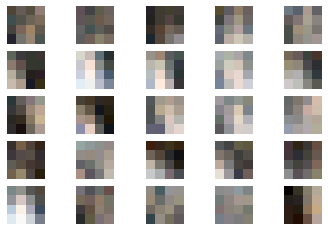

In [ ]:
# number of growth phases, e.g. 5 == [4, 8, 16, 32, 64]
n_blocks = 5
# size of the latent space
latent_dim = 100
# # define models
d_models = define_discriminator(n_blocks)
# define models
g_models = define_generator(latent_dim, n_blocks)

# define composite models
gan_models = define_composite(d_models, g_models)

# Print data info

print('Loaded Dataset info:', training_set.shape)

# # train model
n_batch = [16, 16, 16, 8, 4]
# # 10 epochs == 500K images per training phase
n_epochs = [5, 8, 8, 10, 10]
train(g_models, d_models, gan_models, training_set, latent_dim, n_epochs, n_epochs, n_batch)